In [87]:
# Author: University of Washington Center for Human Rights
# Date: 2020-11-24
# License: GPL 3.0 or greater
# Path: ice-air/installment3/analyze/note/passengers.ipynb

import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
with open('../input/passenger-dtypes.yaml', 'r') as yamlfile:
    column_types = yaml.load(yamlfile)

In [89]:
# Need to update for new dataset

column_types

{'ANumber': 'category',
 'AOR_AOR': 'category',
 'AOR_AORID': 'float32',
 'AOR_AORName': 'category',
 'Age': 'float32',
 'AlienMasterID': 'int',
 'ClassLvl': 'float32',
 'Code': 'category',
 'Convictions': 'category',
 'CountryOfCitizenship': 'category',
 'Criminality': 'category',
 'DOB': 'category',
 'DropLoc': 'category',
 'FamilyUnitFlag': 'float32',
 'FirstName': 'category',
 'GangMember': 'category',
 'Juvenile': 'bool',
 'LastName': 'category',
 'MissionID': 'uint16',
 'MissionMonth': 'uint8',
 'MissionNumber': 'uint32',
 'MissionQuarter': 'uint8',
 'MissionWeek': 'uint8',
 'MissionYear': 'uint16',
 'NonCriminal': 'bool',
 'PULOC': 'category',
 'R-T': 'category',
 'ReasonStruck': 'category',
 'Sex': 'category',
 'Status': 'category',
 'StrikeFromList': 'float32',
 'UnaccompaniedFlag': 'float32',
 'air2_AirportID': 'float32',
 'air2_AirportName': 'category',
 'air2_City': 'category',
 'air2_Country': 'category',
 'air2_LatitudeDecimalDegrees': 'float',
 'air2_LongitudeDecimalDegr

In [90]:
list(column_types)[0]

'ANumber'

In [91]:
column_types['MissionMonth'] = 'object'

In [92]:
read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
#                  'dtype': column_types,
                 'parse_dates': ['MissionDate'],
                 'infer_datetime_format': True}

df = pd.read_csv('../input/ARTS_Passenger-redacted.csv.gz', **read_csv_opts)

df.info(memory_usage='deep')

/home/philneff/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341290 entries, 0 to 341289
Data columns (total 47 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ANumber               341290 non-null  object        
 1   LastName              341290 non-null  object        
 2   FirstName             341290 non-null  object        
 3   DOB                   341290 non-null  object        
 4   Status                333475 non-null  object        
 5   Sex                   341287 non-null  object        
 6   Convictions           333371 non-null  object        
 7   GangMember            333211 non-null  object        
 8   ClassLvl              68 non-null      float64       
 9   Age                   341092 non-null  float64       
 10  MissionDate           341290 non-null  datetime64[ns]
 11  MissionNumber         341290 non-null  int64         
 12  PULOC                 341290 non-null  object        
 13 

In [93]:
df.head()

,ANumber,LastName,FirstName,DOB,Status,Sex,Convictions,GangMember,ClassLvl,Age,...,air_Country,air2_AirportID,air2_AirportName,air2_City,st2_StateID,st2_StateAbbr,aor2_AORID,aor2_AOR,aor2_AORName,air2_Country
0,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),8F/PACR,F,NC,N,NaN,36.0,...,USA,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala
1,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),8F/PACR,M,NC,N,NaN,4.0,...,USA,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala
2,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),8F/PACR,M,NC,N,NaN,24.0,...,USA,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala
3,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),8F/PACR,M,NC,N,NaN,4.0,...,USA,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala
4,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),8F/PACR,M,NC,N,NaN,8.0,...,USA,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala


# Questions
- Decrease in passengers, changes in certain locations versus others: Guate v. El Salvador for example
- Change in domestic versus intl. trends
- Validating versus public-source tracking

# PULOC - DropLoc

`PULOC` and `DropLoc` fields are redacted here, but their corresponding meta fields, including `air_AirportName` and `air2_AirportName`, are not redacted. It is therefore trivial to reconstruct these fields. We will also be able to use these values and associated `MissionID` to partially reconstruct mission itineraries.

In [94]:
with open('../input/airport_dict.yaml', 'r') as yamlfile:
    air_dict = yaml.load(yamlfile)

In [95]:
name_dict = {v['AirportName']: k for k, v in air_dict.items()}

In [96]:
df['PULOC'] = df['air_AirportName'].replace(name_dict)
df['DropLoc'] = df['air2_AirportName'].replace(name_dict)

In [97]:
sum(df['PULOC'].isnull())

61

In [98]:
sum(df['DropLoc'].isnull())

40

In [99]:
df['MissionDate'] = pd.to_datetime(df["MissionDate"])

In [100]:
df['MissionDate'].describe()

count                  341290
unique                    483
top       2019-04-12 00:00:00
freq                     1532
first     2018-10-01 00:00:00
last      2020-05-08 00:00:00
Name: MissionDate, dtype: object

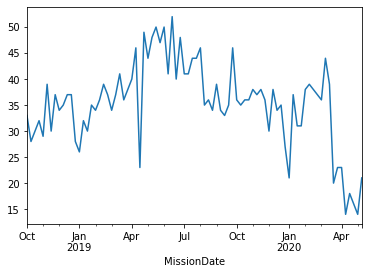

In [101]:
# Missions per month
df.set_index('MissionDate').groupby(pd.Grouper(freq='W'))['MissionID'].nunique().plot()

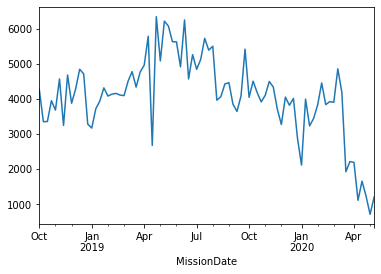

In [102]:
# Passengers per month
df.set_index('MissionDate').groupby(pd.Grouper(freq='W'))['MissionID'].count().plot()

In [103]:
# Passengers per mission over time

# R-T

In [104]:
df['R-T'].unique()

array(['REMOVAL', 'Removal', 'Transfer', 'TRANSFER', 'CBP', 'transfer'],
      dtype=object)

In [105]:
r_t_clean = {'REMOVAL': 'R', 'Removal': 'R', 'Transfer': 'T', 'TRANSFER': 'T', 'CBP': 'T', 'transfer': 'T'}

In [106]:
df['R-T'] = df['R-T'].replace(r_t_clean)

In [107]:
r_t_data = df.set_index('MissionDate').groupby(pd.Grouper(freq='M'))['R-T'].value_counts().unstack()

In [108]:
r_t_data['all'] = r_t_data.sum(axis=1)

In [109]:
r_t_data['T_norm'] = r_t_data['T'] / r_t_data['all']

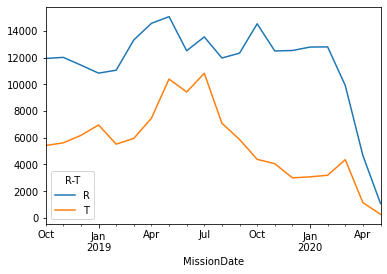

In [110]:
# Transfer/Removal passengers
df.set_index('MissionDate').groupby(pd.Grouper(freq='M'))['R-T'].value_counts().unstack().plot()

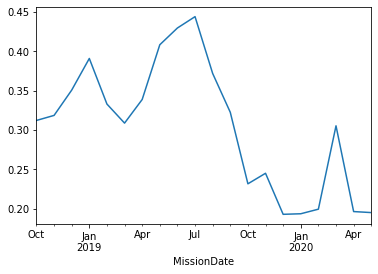

In [111]:
# Proportion transfer passengers
r_t_data['T_norm'].plot()

In [112]:
# More detail on transfers

# Juvenile

In [113]:
df['Juvenile'].unique()

array(['No', 'Yes', nan], dtype=object)

In [114]:
df['Juvenile'].value_counts(dropna=False)

No     329505
Yes     11587
NaN       198
Name: Juvenile, dtype: int64

In [115]:
df['Juvenile'] = df['Juvenile'].replace({'No': False, 'Yes': True})

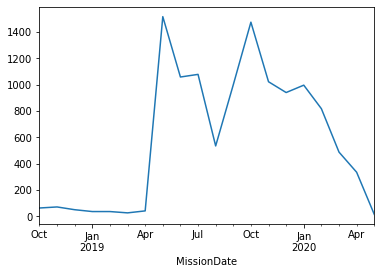

In [116]:
# Total juveniles
df.set_index('MissionDate').groupby(pd.Grouper(freq='M'))['Juvenile'].sum().plot()

In [117]:
data = df.set_index('MissionDate').groupby([pd.Grouper(freq='M'),'R-T'])['Juvenile'].sum().unstack()

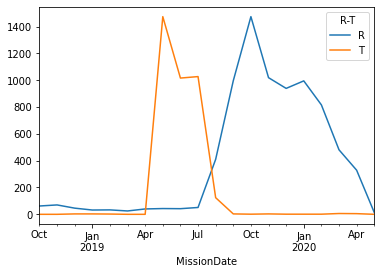

In [118]:
data.plot()

In [119]:
juv = df.loc[df['Juvenile'] == True, :]

In [120]:
juv['CountryOfCitizenship'].value_counts()

GUATEMALA                   5483
HONDURAS                    4446
EL SALVADOR                 1108
BRAZIL                       244
HAITI                         94
NICARAGUA                     93
ECUADOR                       68
VENEZUELA                     13
MEXICO                        11
CUBA                          10
UNITED STATES OF AMERICA       3
COLOMBIA                       3
DOMINICAN REPUBLIC             3
BELIZE                         1
CHILE                          1
PERU                           1
Name: CountryOfCitizenship, dtype: int64

In [121]:
citizenship = juv['CountryOfCitizenship'].value_counts()
top_3 = pd.DataFrame(citizenship.head(3))
all_others = juv[~juv['CountryOfCitizenship'].isin(list(top_3.index))]
top_3.loc['ALL OTHERS', 'CountryOfCitizenship'] = len(all_others)
top_3['CountryOfCitizenship'] = top_3['CountryOfCitizenship'].astype(int)
top_3 = top_3.rename({'CountryOfCitizenship': 'passengers'}, axis=1)
top_3.index.name = 'CountryOfCitizenship'

In [122]:
top_3

,passengers
CountryOfCitizenship,
GUATEMALA,5483
HONDURAS,4446
EL SALVADOR,1108
ALL OTHERS,550


In [123]:
juv['Top3Citizenship'] = juv['CountryOfCitizenship'].copy()

/home/philneff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
mask = juv['Top3Citizenship'].isin(list(top_3.index))

In [125]:
juv.loc[~mask, 'Top3Citizenship'] = 'ALL OTHERS'

/home/philneff/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [126]:
juv['Top3Citizenship'].value_counts()

GUATEMALA      5483
HONDURAS       4446
EL SALVADOR    1108
ALL OTHERS      550
Name: Top3Citizenship, dtype: int64

In [127]:
juv[juv['R-T'] == 'R']

,ANumber,LastName,FirstName,DOB,Status,Sex,Convictions,GangMember,ClassLvl,Age,...,air2_AirportID,air2_AirportName,air2_City,st2_StateID,st2_StateAbbr,aor2_AORID,aor2_AOR,aor2_AORName,air2_Country,Top3Citizenship
1,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),8F/PACR,M,NC,N,NaN,4.0,...,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala,GUATEMALA
3,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),8F/PACR,M,NC,N,NaN,4.0,...,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala,GUATEMALA
4,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),8F/PACR,M,NC,N,NaN,8.0,...,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala,GUATEMALA
5,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),8F/PACR,M,NC,N,NaN,6.0,...,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala,GUATEMALA
6,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),8F/PACR,M,NC,N,NaN,12.0,...,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala,GUATEMALA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340755,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),ER,M,NC,N,NaN,4.0,...,150.0,Ramon Villeda Morales International Airport,San Pedro Sula,NaN,NaN,NaN,NaN,NaN,Honduras,HONDURAS
340867,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),8F,F,NC,N,NaN,15.0,...,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala,GUATEMALA
340869,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),8F,F,NC,N,NaN,7.0,...,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala,GUATEMALA
340872,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),8F,F,NC,N,NaN,17.0,...,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala,GUATEMALA


In [128]:
data_r = juv[juv['R-T'] == 'R'].set_index('MissionDate').groupby([pd.Grouper(freq='M')])['Top3Citizenship'].value_counts(dropna=False).unstack()

In [129]:
data_t = juv[juv['R-T'] == 'T'].set_index('MissionDate').groupby([pd.Grouper(freq='M'),'Top3Citizenship'])['ANumber'].count().unstack()

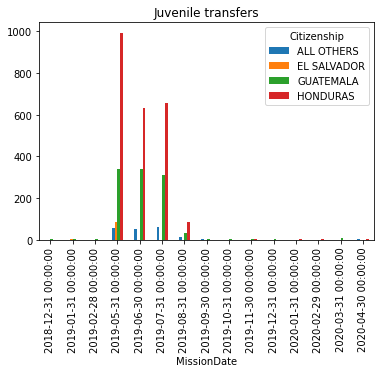

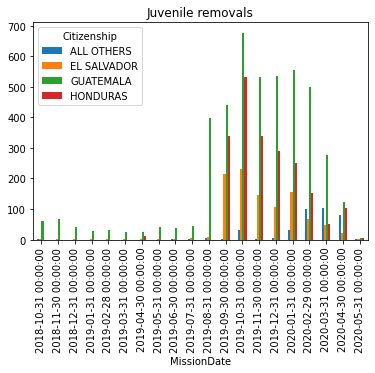

In [130]:
data_t.plot(kind='bar')
plt.title("Juvenile transfers")
plt.legend(title='Citizenship')
data_r.plot(kind='bar')
plt.title("Juvenile removals")
plt.legend(title='Citizenship')

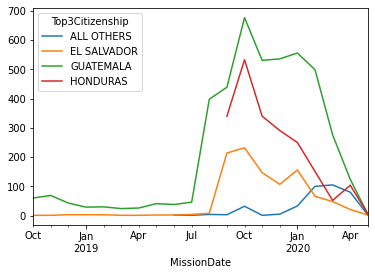

In [131]:
data_r.plot()

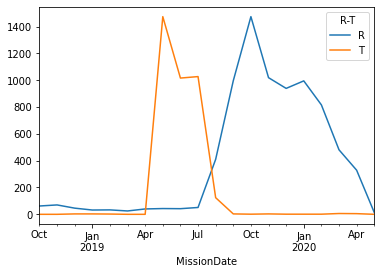

In [132]:
data.plot()

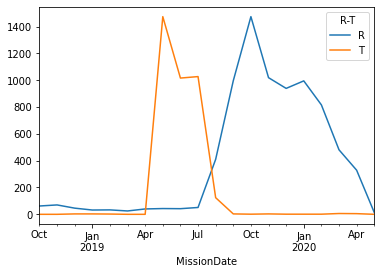

In [133]:
data.plot()

In [134]:
data

R-T,R,T
MissionDate,,
2018-10-31,62,0
2018-11-30,70,0
2018-12-31,46,3
2019-01-31,32,3
2019-02-28,33,2
2019-03-31,25,0
2019-04-30,40,0
2019-05-31,43,1474
2019-06-30,42,1016


# KYKM

In [135]:
kykm_pu = df[df['PULOC'] == 'KYKM']

In [136]:
len(kykm_pu)

2892

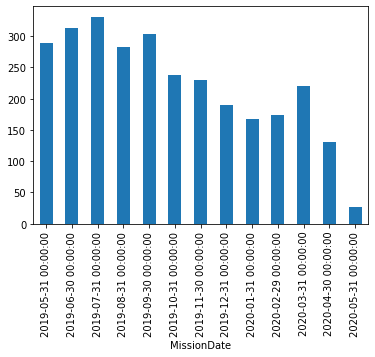

In [137]:
kykm_pu.set_index('MissionDate').groupby(pd.Grouper(freq='M'))['MissionID'].count().plot(kind='bar')

In [138]:
kykm_do = df[df['DropLoc'] == 'KYKM']

In [139]:
len(kykm_do)

1277

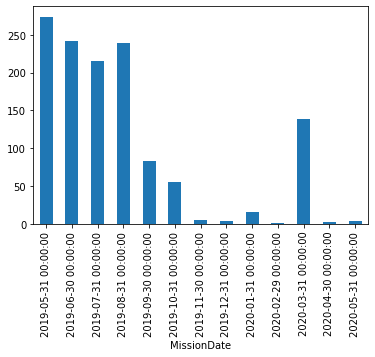

In [140]:
kykm_do.set_index('MissionDate').groupby(pd.Grouper(freq='M'))['MissionID'].count().plot(kind='bar')

In [141]:
daily_dropoffs = kykm_do.set_index('MissionDate').groupby(pd.Grouper(freq='D'))['ANumber'].count()

In [142]:
dropoffs_2020 = daily_dropoffs['2020']

In [143]:
dropoffs_2020[dropoffs_2020 != 0]

MissionDate
2020-01-21      1
2020-01-28     14
2020-02-04      1
2020-03-01    133
2020-03-03      2
2020-03-10      3
2020-04-21      1
2020-04-28      1
2020-05-05      4
Name: ANumber, dtype: int64

In [144]:
kykm_do['R-T'].value_counts()

T    1277
Name: R-T, dtype: int64

In [145]:
kykm_pu['R-T'].value_counts()

R    1869
T    1023
Name: R-T, dtype: int64

# Guate

In [146]:
guate = df[df['DropLoc'] == 'MGGT']

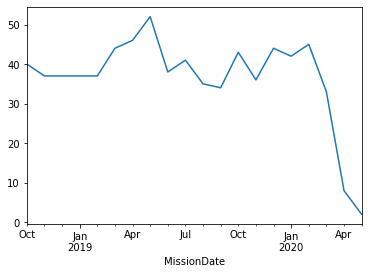

In [147]:
guate.set_index('MissionDate').groupby(pd.Grouper(freq='M'))['MissionID'].nunique().plot()

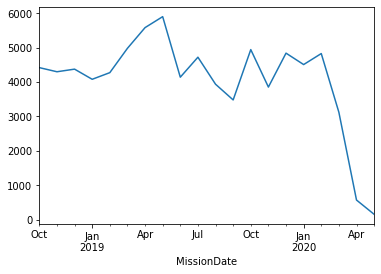

In [148]:
guate.set_index('MissionDate').groupby(pd.Grouper(freq='M'))['MissionID'].count().plot()

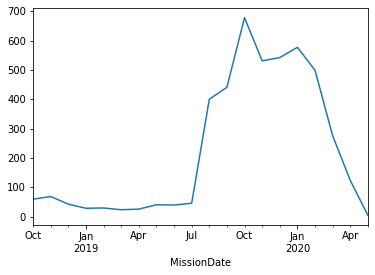

In [149]:
guate.set_index('MissionDate').groupby(pd.Grouper(freq='M'))['Juvenile'].sum().plot()

In [150]:
guate_juv = guate.set_index('MissionDate').groupby(pd.Grouper(freq='M'))['Juvenile'].value_counts().unstack()

In [151]:
guate_juv['Total'] = guate_juv.sum(axis=1)

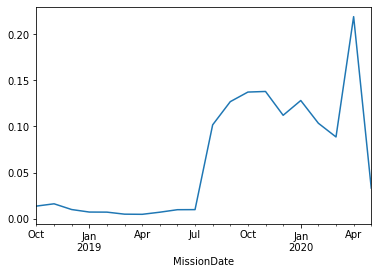

In [152]:
(guate_juv[True] / guate_juv['Total']).plot()

# Haiti

In [153]:
# Haiti drop offs
haiti = df[df['air2_Country'] == 'Haiti']

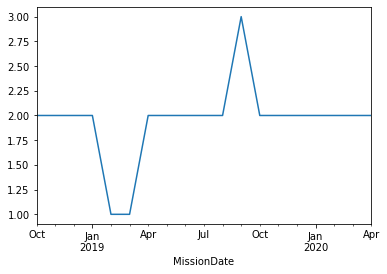

In [154]:
haiti.set_index('MissionDate').groupby(pd.Grouper(freq='M'))['MissionID'].nunique().plot()

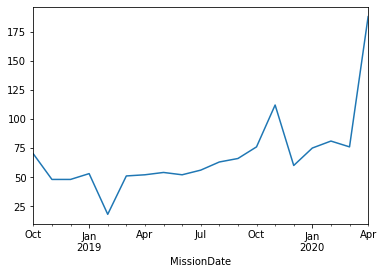

In [155]:
haiti.set_index('MissionDate').groupby(pd.Grouper(freq='M'))['MissionID'].count().plot()

In [156]:
haiti['Status'].str.upper().value_counts()

8G    519
8C    276
3     275
8F    111
16     41
11     17
8B     12
8I      5
2A      4
8E      3
5B      3
8A      3
8K      3
5C      2
8H      2
14      2
8D      1
10      1
ML      1
2B      1
5F      1
HI      1
Name: Status, dtype: int64